# Bicycle Thefts in Toronto

In [1]:
# Suggested Tasks:

# Data Exploration: Familiarize yourself with the dataset. Identify key variables such as date, location, bike type, etc.

# Temporal Analysis: Analyze temporal trends in bicycle thefts. Are there seasons or times of day when thefts are more frequent?

# Geographical Analysis: Map the locations of bicycle thefts. Are there particular areas that are more heavily affected?

# Profiles of Stolen Bikes: Examine characteristics of stolen bikes (brand, model, color). Are there specific types of bikes that are targeted more often?

# Theft Network: Explore the possibility of links between bicycle thefts. Are there patterns indicating organized operations?

# Predictive Factors: Identify potential predictive factors for bicycle thefts. This could include variables such as weather, holidays, etc.

# Recommendations: Formulate recommendations based on your analyses to help the police prevent bicycle thefts and improve recovery.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', '{:.2f}'.format)


In [3]:
# loading the data and taking a look at the first 5 rows
df_bicycle = pd.read_csv('data\Bicycle_Thefts_Open_Data.csv')
df = df_bicycle.copy()
df.head()

<>:2: SyntaxWarning: invalid escape sequence '\B'
<>:2: SyntaxWarning: invalid escape sequence '\B'
C:\Users\kyana\AppData\Local\Temp\ipykernel_36604\3012644759.py:2: SyntaxWarning: invalid escape sequence '\B'
  df_bicycle = pd.read_csv('data\Bicycle_Thefts_Open_Data.csv')


,X,Y,OBJECTID,EVENT_UNIQUE_ID,PRIMARY_OFFENCE,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DAY,OCC_DOY,OCC_HOUR,REPORT_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DOW,REPORT_DAY,REPORT_DOY,REPORT_HOUR,DIVISION,LOCATION_TYPE,PREMISES_TYPE,BIKE_MAKE,BIKE_MODEL,BIKE_TYPE,BIKE_SPEED,BIKE_COLOUR,BIKE_COST,STATUS,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
0,-8840398.79,5413057.03,1,GO-20141263784,PROPERTY - FOUND,2014/01/01 05:00:00+00,2014,January,Wednesday,1,1,18,2014/01/01 05:00:00+00,2014,January,Wednesday,1,1,18,D14,"Single Home, House (Attach Garage, Cottage, Mo...",House,TREK,SOHO S,RG,1.00,BLK,NaN,RECOVERED,80,Palmerston-Little Italy,80,Palmerston-Little Italy (80),-79.41,43.66
1,-8843626.12,5409538.96,2,GO-20141261431,THEFT UNDER,2014/01/01 05:00:00+00,2014,January,Wednesday,1,1,7,2014/01/01 05:00:00+00,2014,January,Wednesday,1,1,7,D14,"Apartment (Rooming House, Condo)",Apartment,SUPERCYCLE,NaN,MT,10.00,NaN,NaN,STOLEN,85,South Parkdale,85,South Parkdale (85),-79.44,43.64
2,-8838282.52,5409902.51,3,GO-20141263544,B&E,2013/12/26 05:00:00+00,2013,December,Thursday,26,360,19,2014/01/01 05:00:00+00,2014,January,Wednesday,1,1,17,D14,Other Commercial / Corporate Places (For Profi...,Commercial,FELT,F59,RC,21.00,SILRED,1300.00,STOLEN,165,Harbourfront-CityPlace,77,Waterfront Communities-The Island (77),-79.40,43.64
3,-8842058.81,5421970.66,4,GO-20141266048,THEFT UNDER,2013/12/30 05:00:00+00,2013,December,Monday,30,364,17,2014/01/02 05:00:00+00,2014,January,Thursday,2,2,8,D53,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,KHS,VITAMIN A,OT,24.00,WHI,500.00,STOLEN,39,Bedford Park-Nortown,39,Bedford Park-Nortown (39),-79.43,43.72
4,-8838072.94,5410325.76,5,GO-20149000090,THEFT UNDER,2014/01/01 05:00:00+00,2014,January,Wednesday,1,1,12,2014/01/02 05:00:00+00,2014,January,Thursday,2,2,20,D52,"Apartment (Rooming House, Condo)",Apartment,GI,TCX2 (2010),OT,9.00,BLU,1019.00,STOLEN,165,Harbourfront-CityPlace,77,Waterfront Communities-The Island (77),-79.39,43.64


In [4]:
# checking the shape of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35325 entries, 0 to 35324
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  35325 non-null  float64
 1   Y                  35325 non-null  float64
 2   OBJECTID           35325 non-null  int64  
 3   EVENT_UNIQUE_ID    35325 non-null  object 
 4   PRIMARY_OFFENCE    35325 non-null  object 
 5   OCC_DATE           35325 non-null  object 
 6   OCC_YEAR           35325 non-null  int64  
 7   OCC_MONTH          35325 non-null  object 
 8   OCC_DOW            35325 non-null  object 
 9   OCC_DAY            35325 non-null  int64  
 10  OCC_DOY            35325 non-null  int64  
 11  OCC_HOUR           35325 non-null  int64  
 12  REPORT_DATE        35325 non-null  object 
 13  REPORT_YEAR        35325 non-null  int64  
 14  REPORT_MONTH       35325 non-null  object 
 15  REPORT_DOW         35325 non-null  object 
 16  REPORT_DAY         353

In [5]:
df['OCC_DATE'] = pd.to_datetime(df['OCC_DATE'])

In [6]:
# describing the data to get a better understanding of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X,35325.00,-8756347.59,846437.01,-8863505.63,-8840818.57,-8837723.42,-8835727.45,0.00
Y,35325.00,5365059.49,518634.78,0.00,5411475.83,5413315.25,5416533.22,5440288.68
OBJECTID,35325.00,17663.00,10197.59,1.00,8832.00,17663.00,26494.00,35325.00
OCC_YEAR,35325.00,2018.44,2.80,1975.00,2016.00,2018.00,2021.00,2024.00
OCC_DAY,35325.00,15.65,8.63,1.00,8.00,16.00,23.00,31.00
OCC_DOY,35325.00,200.64,78.52,1.00,150.00,204.00,259.00,366.00
OCC_HOUR,35325.00,13.29,6.54,0.00,9.00,14.00,18.00,23.00
REPORT_YEAR,35325.00,2018.46,2.78,2014.00,2016.00,2018.00,2021.00,2024.00
REPORT_DAY,35325.00,15.97,8.60,1.00,9.00,16.00,23.00,31.00
REPORT_DOY,35325.00,201.56,78.84,1.00,151.00,205.00,260.00,366.00


In [7]:
# checking for missing values
df.isnull().sum()

X                        0
Y                        0
OBJECTID                 0
EVENT_UNIQUE_ID          0
PRIMARY_OFFENCE          0
OCC_DATE                 0
OCC_YEAR                 0
OCC_MONTH                0
OCC_DOW                  0
OCC_DAY                  0
OCC_DOY                  0
OCC_HOUR                 0
REPORT_DATE              0
REPORT_YEAR              0
REPORT_MONTH             0
REPORT_DOW               0
REPORT_DAY               0
REPORT_DOY               0
REPORT_HOUR              0
DIVISION                 0
LOCATION_TYPE            0
PREMISES_TYPE            0
BIKE_MAKE              173
BIKE_MODEL           13177
BIKE_TYPE                0
BIKE_SPEED             632
BIKE_COLOUR           3091
BIKE_COST             2399
STATUS                   0
HOOD_158                 0
NEIGHBOURHOOD_158        0
HOOD_140                 0
NEIGHBOURHOOD_140        0
LONG_WGS84               0
LAT_WGS84                0
dtype: int64

In [8]:
# checking for the percentage of missing values
# we dont need the columns with more than 50% missing values
df.isnull().mean() * 100

X                    0.00
Y                    0.00
OBJECTID             0.00
EVENT_UNIQUE_ID      0.00
PRIMARY_OFFENCE      0.00
OCC_DATE             0.00
OCC_YEAR             0.00
OCC_MONTH            0.00
OCC_DOW              0.00
OCC_DAY              0.00
OCC_DOY              0.00
OCC_HOUR             0.00
REPORT_DATE          0.00
REPORT_YEAR          0.00
REPORT_MONTH         0.00
REPORT_DOW           0.00
REPORT_DAY           0.00
REPORT_DOY           0.00
REPORT_HOUR          0.00
DIVISION             0.00
LOCATION_TYPE        0.00
PREMISES_TYPE        0.00
BIKE_MAKE            0.49
BIKE_MODEL          37.30
BIKE_TYPE            0.00
BIKE_SPEED           1.79
BIKE_COLOUR          8.75
BIKE_COST            6.79
STATUS               0.00
HOOD_158             0.00
NEIGHBOURHOOD_158    0.00
HOOD_140             0.00
NEIGHBOURHOOD_140    0.00
LONG_WGS84           0.00
LAT_WGS84            0.00
dtype: float64

In [9]:
# checking for duplicates
df.duplicated().sum()

0

In [10]:
df.head()

,X,Y,OBJECTID,EVENT_UNIQUE_ID,PRIMARY_OFFENCE,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DAY,OCC_DOY,OCC_HOUR,REPORT_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DOW,REPORT_DAY,REPORT_DOY,REPORT_HOUR,DIVISION,LOCATION_TYPE,PREMISES_TYPE,BIKE_MAKE,BIKE_MODEL,BIKE_TYPE,BIKE_SPEED,BIKE_COLOUR,BIKE_COST,STATUS,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
0,-8840398.79,5413057.03,1,GO-20141263784,PROPERTY - FOUND,2014-01-01 05:00:00+00:00,2014,January,Wednesday,1,1,18,2014/01/01 05:00:00+00,2014,January,Wednesday,1,1,18,D14,"Single Home, House (Attach Garage, Cottage, Mo...",House,TREK,SOHO S,RG,1.00,BLK,NaN,RECOVERED,80,Palmerston-Little Italy,80,Palmerston-Little Italy (80),-79.41,43.66
1,-8843626.12,5409538.96,2,GO-20141261431,THEFT UNDER,2014-01-01 05:00:00+00:00,2014,January,Wednesday,1,1,7,2014/01/01 05:00:00+00,2014,January,Wednesday,1,1,7,D14,"Apartment (Rooming House, Condo)",Apartment,SUPERCYCLE,NaN,MT,10.00,NaN,NaN,STOLEN,85,South Parkdale,85,South Parkdale (85),-79.44,43.64
2,-8838282.52,5409902.51,3,GO-20141263544,B&E,2013-12-26 05:00:00+00:00,2013,December,Thursday,26,360,19,2014/01/01 05:00:00+00,2014,January,Wednesday,1,1,17,D14,Other Commercial / Corporate Places (For Profi...,Commercial,FELT,F59,RC,21.00,SILRED,1300.00,STOLEN,165,Harbourfront-CityPlace,77,Waterfront Communities-The Island (77),-79.40,43.64
3,-8842058.81,5421970.66,4,GO-20141266048,THEFT UNDER,2013-12-30 05:00:00+00:00,2013,December,Monday,30,364,17,2014/01/02 05:00:00+00,2014,January,Thursday,2,2,8,D53,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,KHS,VITAMIN A,OT,24.00,WHI,500.00,STOLEN,39,Bedford Park-Nortown,39,Bedford Park-Nortown (39),-79.43,43.72
4,-8838072.94,5410325.76,5,GO-20149000090,THEFT UNDER,2014-01-01 05:00:00+00:00,2014,January,Wednesday,1,1,12,2014/01/02 05:00:00+00,2014,January,Thursday,2,2,20,D52,"Apartment (Rooming House, Condo)",Apartment,GI,TCX2 (2010),OT,9.00,BLU,1019.00,STOLEN,165,Harbourfront-CityPlace,77,Waterfront Communities-The Island (77),-79.39,43.64


# Temporal Analysis

In [11]:
# selecting the last 10 years of data
df = df[df['OCC_YEAR'] >= 2014]
# df = df[(df['OCC_YEAR'] >= 2014) & (df['OCC_YEAR'] < 2024)]

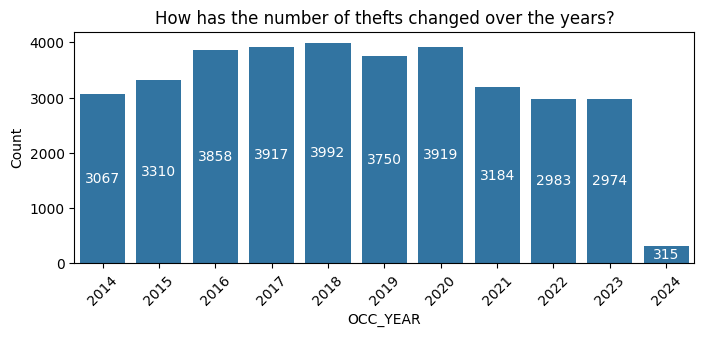

In [12]:
# checking the number of thefts by year
# on this graph we can appreciate a growing pattern from 2014 to 2018
# the number of thefts has been decreasing over the last few years
# i dont have full data for 2024 to analyze. Maybe i can predict the number of thefts for 2024.
plt.figure(figsize=(8, 3))
ax = sns.countplot(data=df, x='OCC_YEAR')
ax.bar_label(ax.containers[0], fmt='%.0f', label_type='center', color='white')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('How has the number of thefts changed over the years?')
plt.show()


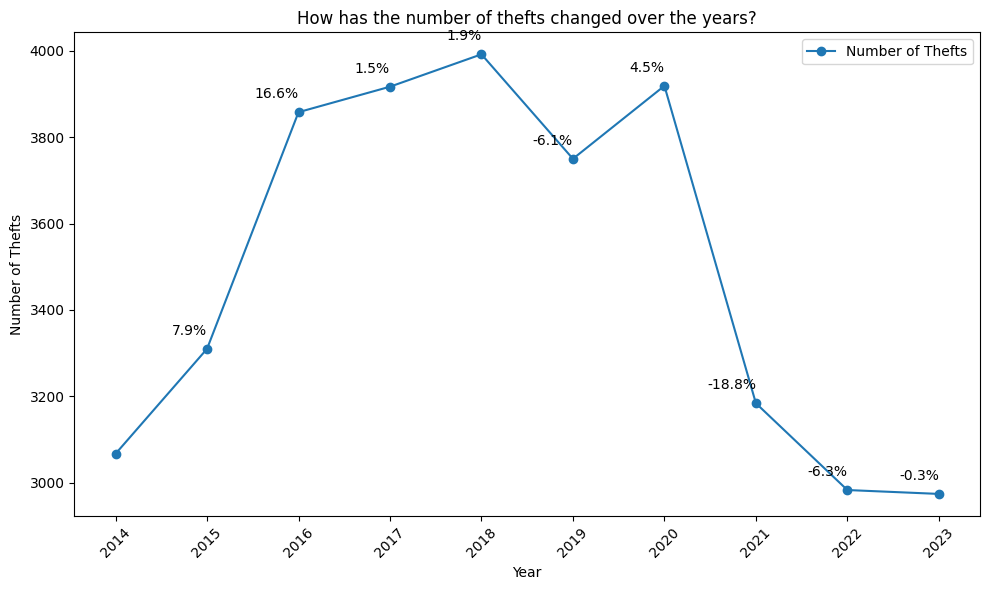

In [13]:
# Group data by year and count occurrences, excluding 2024
yearly_counts = df[df['OCC_YEAR'] != 2024]['OCC_YEAR'].value_counts().sort_index()

# Calculate year-over-year percentage change
percentage_change = yearly_counts.pct_change() * 100

# Create line chart
plt.figure(figsize=(10, 6))

# Plot the number of thefts
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', linestyle='-', label='Number of Thefts')

# Add year-over-year percentage change annotations
for i, txt in enumerate(percentage_change.values[1:]):
    plt.annotate(f'{txt:.1f}%', (yearly_counts.index[i+1], yearly_counts.values[i+1]), textcoords="offset points", xytext=(0,10), ha='right')

plt.xlabel('Year')
plt.ylabel('Number of Thefts')
plt.title('How has the number of thefts changed over the years?')
plt.xticks(yearly_counts.index, rotation=45)
plt.grid(False)
plt.legend()

plt.tight_layout()
plt.show()

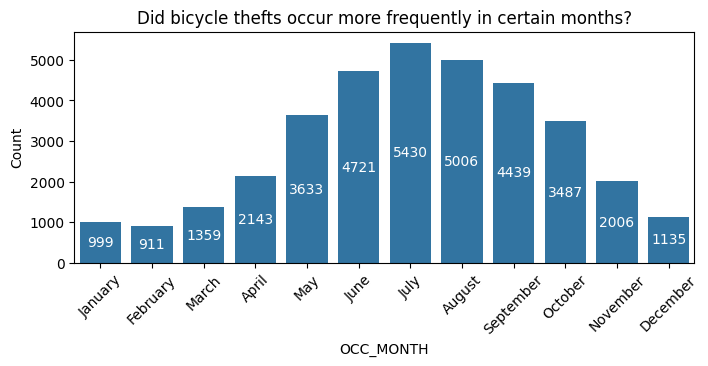

In [14]:
# checking the number of thefts by month
# There is a seasonality in thefts. Bicycle thefts increase in summer with a peak in July.
plt.figure(figsize=(8, 3))
ax = sns.countplot(data=df, x='OCC_MONTH')
ax.bar_label(ax.containers[0], fmt='%.0f', label_type='center', color='white')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Did bicycle thefts occur more frequently in certain months?')
plt.show()

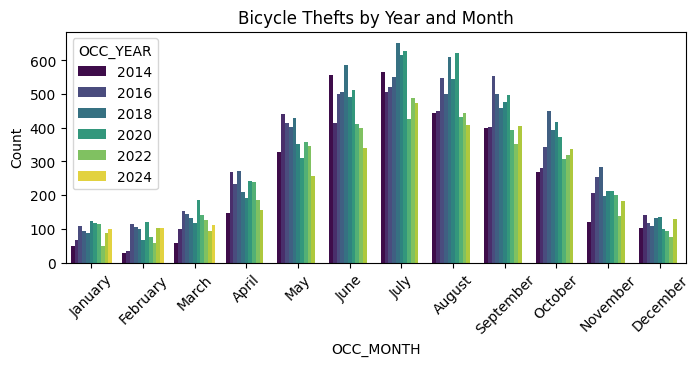

In [15]:
# checking the number of thefts by year and month. 
# from december 2023 to february 2024 there is an increase in the number of thefts compared to the previous years.
plt.figure(figsize=(8, 3))
sns.countplot(data=df, x='OCC_MONTH', hue='OCC_YEAR', palette='viridis')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Bicycle Thefts by Year and Month')
plt.show()

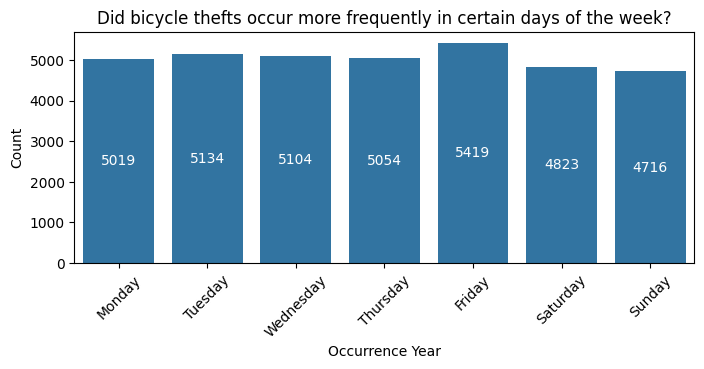

In [16]:
# checking the number of thefts by day of the week.
# The number of thefts is higher on weekdays than weekends with a peak on Friday.
plt.figure(figsize=(8, 3))
ax = sns.countplot(data=df, x='OCC_DOW', 
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
              )
ax.bar_label(ax.containers[0], fmt='%.0f', label_type='center', color='white')
plt.xticks(rotation=45)
plt.xlabel('Occurrence Year')
plt.ylabel('Count')
plt.title('Did bicycle thefts occur more frequently in certain days of the week?')
plt.show()

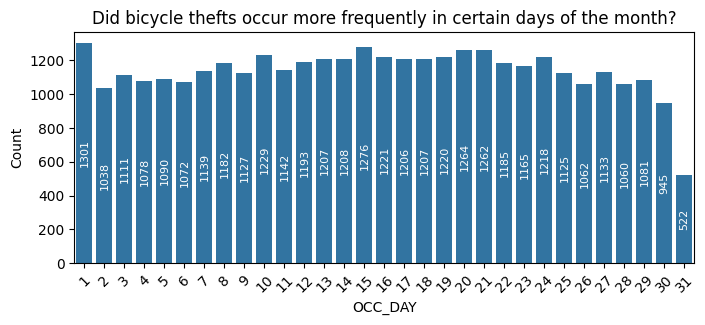

In [17]:
# checking the number of thefts by day of the month
plt.figure(figsize=(8, 3))
ax = sns.countplot(data=df, x='OCC_DAY')
ax.bar_label(ax.containers[0], fmt='%.0f', label_type='center', color='white', rotation=90, size=8)
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Did bicycle thefts occur more frequently in certain days of the month?')
plt.show()

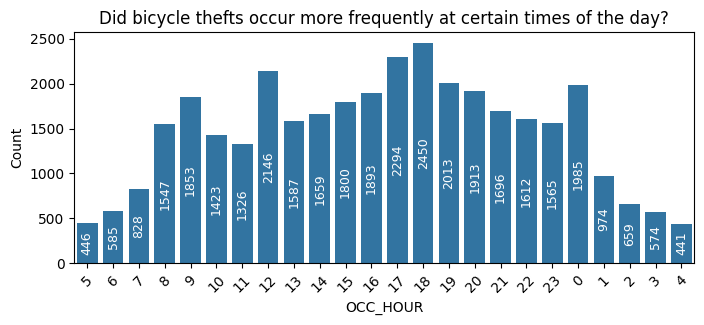

In [18]:
# checking the number of thefts by hour
# The number of thefts increase from 12:00 with a peak between 17:00 - 18:00.
hours = sorted(df['OCC_HOUR'].unique(), key=lambda x: (x < 5, x))
df['OCC_HOUR'] = pd.Categorical(df['OCC_HOUR'], categories=hours, ordered=True)
plt.figure(figsize=(8, 3))
ax = sns.countplot(data=df, x='OCC_HOUR')
ax.bar_label(ax.containers[0], fmt='%.0f', label_type='center', color='white', rotation=90, size=9)
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Did bicycle thefts occur more frequently at certain times of the day?')
plt.show()

# Geographical Analysis

In [27]:
import folium
from folium.plugins import HeatMap
from geopy.geocoders import Nominatim

df_map = df.dropna(subset=['LONG_WGS84', 'LAT_WGS84'])

df_map = df_map[df_map['OCC_YEAR'] >= 2014]

toronto_map1 = folium.Map(location=[43.7, -79.4], zoom_start=11)

coordinates = df_map[['LAT_WGS84', 'LONG_WGS84']]
coordinates_counts = coordinates.groupby(coordinates.columns.tolist()).size().reset_index()
coordinates_counts.columns = ['LAT_WGS84', 'LONG_WGS84', 'Count']

heat_data = [[row['LAT_WGS84'], row['LONG_WGS84'], row['Count']] for index, row in coordinates_counts.iterrows()]
HeatMap(heat_data, radius=15).add_to(toronto_map1) 

toronto_map1.save('toronto_heatmap1.html')


In [28]:
df_map2 = df.dropna(subset=['LONG_WGS84', 'LAT_WGS84'])

df_map2 = df_map2[df_map2['OCC_YEAR'] >= 2024]

toronto_map2 = folium.Map(location=[43.7, -79.4], zoom_start=11)

coordinates = df_map2[['LAT_WGS84', 'LONG_WGS84']]
coordinates_counts = coordinates.groupby(coordinates.columns.tolist()).size().reset_index()
coordinates_counts.columns = ['LAT_WGS84', 'LONG_WGS84', 'Count']

heat_data2 = [[row['LAT_WGS84'], row['LONG_WGS84'], row['Count']] for index, row in coordinates_counts.iterrows()]
HeatMap(heat_data2, radius=15).add_to(toronto_map2) 

toronto_map2.save('toronto_heatmap2.html')

In [ ]:
# A geographical analysis using Folium provided insights into high-theft areas. Most thefts occurred in the downtown area, near Yonge Bay Corridor and Wellington Place
# The heat map also showed an increase in thefts in the east end of Toronto in 2024.

# Profiles of Stolen Bikes

In [20]:
# checking the number of thefts by bike type
df.replace({'BIKE_TYPE': {'BM':'BMX', 'EL':'Electric', 'FO':'Folding', 'MT':'Mountain', 'OT':'Other',
                          'RC':'Racer', 'RE':'Recumbant', 'RG':'Regular', 'SC':'Scooter', 'TA':'Tandem',
                            'TO':'Touring', 'TR':'Tricycle', 'UN':'Unicycle'}}, inplace=True)

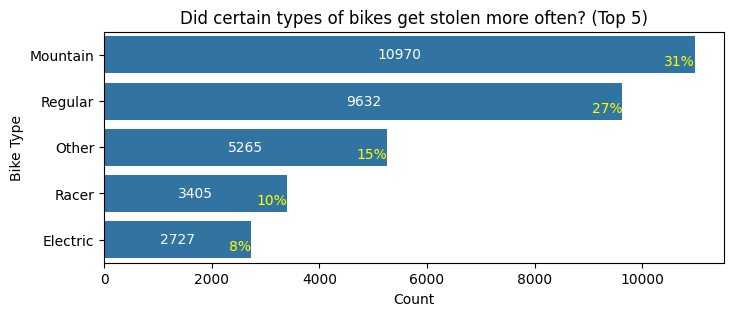

In [33]:
# Excluding uncategorized and unknown types, mountain bikes, regular bikes, and racer bikes are the most frequently stolen.

# Get top 5 bike types
top_bike_types = df['BIKE_TYPE'].value_counts().nlargest(5)

# Calculate percentage of all thefts
total_thefts = df['BIKE_TYPE'].value_counts().sum()
percentage_thefts = top_bike_types / total_thefts * 100
plt.figure(figsize=(8, 3))
# Create the horizontal bar plot using seaborn
ax = sns.barplot(x=top_bike_types.values, y=top_bike_types.index, orient='h')
ax.bar_label(ax.containers[0], fmt='%.0f', label_type='center', color='white')

# Add percentages to the plot
for i, p in enumerate(ax.patches):
    percentage = percentage_thefts[top_bike_types.index[i]]
    ax.annotate(f'{percentage:.0f}%', (p.get_x() + p.get_width() - 3, p.get_y() + p.get_height() / 2), ha='right', va='top', color='yellow')

plt.xlabel('Count')
plt.ylabel('Bike Type')
plt.title('Did certain types of bikes get stolen more often? (Top 5)')

plt.show()

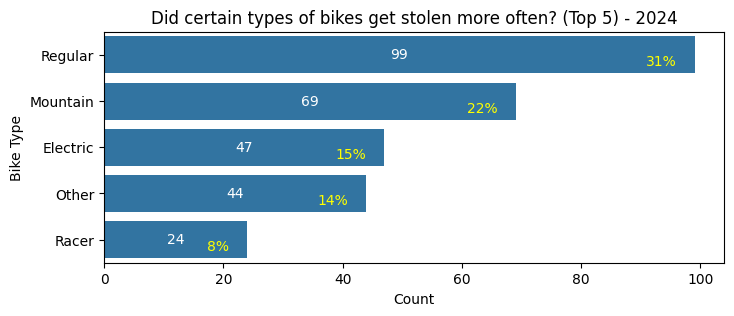

In [32]:
# In present time bicycle thefts of electric bikes have increased compared to the past years.
df_2024 = df[df['OCC_YEAR'] == 2024]

top_bike_types2 = df_2024['BIKE_TYPE'].value_counts().nlargest(5)

total_thefts = df_2024['BIKE_TYPE'].value_counts().sum()
percentage_thefts = top_bike_types2 / total_thefts * 100

plt.figure(figsize=(8, 3))
ax = sns.barplot(x=top_bike_types2.values, y=top_bike_types2.index, orient='h')
ax.bar_label(ax.containers[0], fmt='%.0f', label_type='center', color='white')

for i, p in enumerate(ax.patches):
    percentage = percentage_thefts[top_bike_types2.index[i]]
    ax.annotate(f'{percentage:.0f}%', (p.get_x() + p.get_width() - 3, p.get_y() + p.get_height() / 2), ha='right', va='top', color='yellow')

plt.xlabel('Count')
plt.ylabel('Bike Type')
plt.title('Did certain types of bikes get stolen more often? (Top 5) - 2024')
plt.show()

# Theft Network

In [55]:
# Which neighborhoods have the highest number of thefts?
# The top 10 neighborhoods contribute to 36% of all bicycle thefts.
data_temp1 = df.pivot_table(index='NEIGHBOURHOOD_158', columns='OCC_YEAR', values='OBJECTID', aggfunc='count', fill_value=0, margins=True, margins_name='Grand Total')
data_temp1.drop('Grand Total', axis=0, inplace=True)
data_temp1_sorted = data_temp1.sort_values(by='Grand Total', ascending=False)
data_temp1_sorted['% of Total'] = (data_temp1_sorted['Grand Total'] / data_temp1_sorted['Grand Total'].sum()) * 100
data_temp1_sorted['% of Total'] = data_temp1_sorted['% of Total'].apply(lambda x: f'{x:.0f}%')

top_10_neighbourhoods = data_temp1_sorted.head(10)
styled_top_10_neighbourhoods = top_10_neighbourhoods.style.background_gradient(cmap='Blues', subset=top_10_neighbourhoods.columns[:-1])

display(styled_top_10_neighbourhoods)

OCC_YEAR,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,Grand Total,% of Total
NEIGHBOURHOOD_158,,,,,,,,,,,,,
Yonge-Bay Corridor,225,156,203,210,270,218,171,172,233,222,25,2105,6%
Downtown Yonge East,154,129,118,161,188,175,97,167,180,200,10,1579,4%
Wellington Place,111,94,166,170,184,144,116,105,114,80,22,1306,4%
St Lawrence-East Bayfront-The Islands,126,96,131,117,160,140,129,133,124,104,11,1271,4%
Annex,99,107,126,135,124,149,160,116,80,78,13,1187,3%
Kensington-Chinatown,89,104,130,145,141,117,98,109,87,139,12,1171,3%
Moss Park,100,105,117,138,136,108,112,90,91,99,12,1108,3%
Church-Wellesley,90,105,100,128,91,119,110,96,89,99,11,1038,3%
Harbourfront-CityPlace,69,72,123,153,131,127,75,92,94,87,8,1031,3%


In [59]:
# Which location types have the highest number of thefts?
# The top 5 location types contribute to 75% of all bicycle thefts. Apartment/Condo, streets and houses areas are the most common locations for bicycle thefts.
data_temp2 = df.pivot_table(index='LOCATION_TYPE', columns='OCC_YEAR', values='OBJECTID', aggfunc='count', fill_value=0, margins=True, margins_name='Grand Total')
data_temp2.drop('Grand Total', axis=0, inplace=True)
data_temp2_sorted = data_temp2.sort_values(by='Grand Total', ascending=False)
data_temp2_sorted['% of Total'] = (data_temp2_sorted['Grand Total'] / data_temp2_sorted['Grand Total'].sum()) * 100
data_temp2_sorted['% of Total'] = data_temp2_sorted['% of Total'].apply(lambda x: f'{x:.0f}%')

top_5_locations = data_temp2_sorted.head(5)
styled_top_5_locations = top_5_locations.style.background_gradient(cmap='Blues', subset=top_5_locations.columns[:-1])

display(styled_top_5_locations)

OCC_YEAR,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,Grand Total,% of Total
LOCATION_TYPE,,,,,,,,,,,,,
"Apartment (Rooming House, Condo)",410,567,733,815,984,1135,1322,1019,836,718,92,8631,24%
"Streets, Roads, Highways (Bicycle Path, Private Road)",893,679,806,800,806,647,519,468,554,487,33,6692,19%
"Single Home, House (Attach Garage, Cottage, Mobile)",562,649,631,561,551,498,670,448,255,379,31,5235,15%
"Parking Lots (Apt., Commercial Or Non-Commercial)",260,288,359,409,401,352,377,267,344,249,25,3331,9%
"Private Property Structure (Pool, Shed, Detached Garage)",245,280,297,253,295,325,389,358,254,132,17,2845,8%


In [67]:
status_counts = df['STATUS'].value_counts()
percentage_of_total = (status_counts / status_counts.sum()) * 100
status_distribution = pd.DataFrame({'Status Count': status_counts, '% of Total': percentage_of_total})

status_distribution['% of Total'] = status_distribution['% of Total'].apply(lambda x: f'{int(x)}%' if x.is_integer() else f'{x:.0f}%')

styled_status_distribution = status_distribution.style.background_gradient(cmap='Blues')

display(styled_status_distribution)

,Status Count,% of Total
STATUS,,
STOLEN,34306,97%
UNKNOWN,591,2%
RECOVERED,372,1%


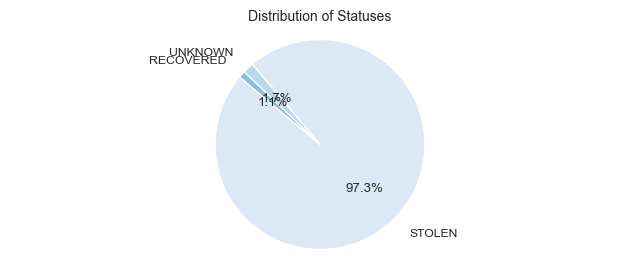

In [78]:
# on this pie chart we can see that most of the cases are still open.
# Set the style and font scale
sns.set(style="whitegrid", font_scale=0.8)

# Plotting pie chart using Seaborn
plt.figure(figsize=(8, 3))
sns.set_palette("Blues")
plt.pie(status_distribution['Status Count'], labels=status_distribution.index, autopct='%1.1f%%', startangle=140, labeldistance=1.2)
plt.title('Distribution of Statuses', fontsize=10)
plt.axis('equal')
plt.show()
